#     Machine Learning in Finance
##     NOVA IMS
####     Group G: Carlos Cardoso - 20211220 | Carlota Reis - 20211208 | Guilherme Miranda - 20210420 | Mariana Garcia - 20210838 

# Project 2 - Classification
## Credit card default
### This notebook uses the dateset *default_credit_card_clients.xlsx*

## Dataset description

- **X1**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- **X2**: Gender (1 = male; 2 = female). 
- **X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- **X4**: Marital status (1 = married; 2 = single; 3 = others). 
- **X5**: Age (year). 
- **X6** - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- **X12-X17**: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- **X18-X23**: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
- **Y**: Indication if the customer defaulted in the following month (0-no, 1-yes).

For additional information on the dataset check https://www.sciencedirect.com/science/article/abs/pii/S0957417407006719

## Work description

### Overview
<p>You should organize into groups of 3 to 5 students, where you will assume the role of a consultant. You are asked to develop a model to predict which customers are likely to default on their credit card in the following month. The bank wants to use the model the decrease operational losses.</p>
<p>Employing the CRISP-DM process model, you are expected to define, describe and explain the model built. Simultaneous, you should explain how your model can help the bank reaching its objectives.</p>

### Questions or additional informations
For any additional questions, don't hesitate to get in touch with the instructor. The instructor will also act as the bank business/project stakeholder.

# ----------------

The Project 2 objective consists of developing data mining models to predict which credit cardholders from Taiwan banks will likely default on the following month, by implementing a CRISP-DM methodology.
The developed models seek to forecast which customers will likely default, or not, in the following month. By having this information, the financial institutions could adjust their procedures when assessing if a customer will likely default or not, when borrowing funds from the bank in the form of a credit card. Besides the client’s personal data it includes historical financial information.


### Business Understanding

As in the previous project, this phase of the CRIPS-DM framework is somehow compromised since we can’t contact the Taiwan banks and directly observe this credit card process. It would also be interesting to interact with their teams and assess if there’s additional information relevant to include in the models. 
Given the business objective, the target variable defined in this problem is a binary classification problem (default - 1 or not default - 0).


## Initializations and data loading

In [24]:
# Loading packages
import category_encoders as ce
import collections
import csv
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import shap
import xgboost
from imblearn.over_sampling import SMOTE
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import export_graphviz
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import RFECV
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot


In [26]:
# Loading the dataset and visualizing summary statistics
ds = pd.read_excel('default_credit_card_clients.xlsx', engine='openpyxl')
ds.describe(include='all').T

count unique    top   freq
Unnamed: 0  30001  30001     ID      1
X1          30001     82  50000   3365
X2          30001      3      2  18112
X3          30001      8      2  14030
X4          30001      5      2  15964
X5          30001     57     29   1605
X6          30001     12      0  14737
X7          30001     12      0  15730
X8          30001     12      0  15764
X9          30001     12      0  16455
X10         30001     11      0  16947
X11         30001     11      0  16286
X12         30001  22724      0   2008
X13         30001  22347      0   2506
X14         30001  22027      0   2870
X15         30001  21549      0   3195
X16         30001  21011      0   3506
X17         30001  20605      0   4020
X18         30001   7944      0   5249
X19         30001   7900      0   5396
X20         30001   7519      0   5968
X21         30001   6938      0   6408
X22         30001   6898      0   6703
X23         30001   6940      0   7173
Y           30001      3      0  23364

The data presented in default_credit_card_clients has a total of 30 000 observations (in the statistics it appears 30 001 since it is considering the label of each variable), described along 23 different features. Since the variables aren’t yet in the correct type, it misses some statistical information which will later be presented.

In [27]:
# Show top rows
ds.head()

Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23                           Y  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                           1  
2      1000         0      2000                           1  
3      1000      1000      5000                           0  
4      1100      1069      1000                           0  

[5 rows x 25 columns]

## Data Understanding

The previous summary statistics and data overview also concern the Data Understanding phase.
It is crucial to deepen the data understanding and examine the dataset and hence it is further verified the presence/absence of missing values, followed by a graphical visualization.
It is confirmed that the data doesn’t present missing values


In [28]:
# Check missing values
print(ds.isnull().sum())

# No missing values on the dataset

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64


In [29]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [30]:
#Drop 1st row

ds = ds.iloc[1:,:]

In [31]:
#Transforming variables
#Numerical

ds = ds.astype({'X1':'float','X5':'float','X12':'float','X13':'float','X14':'float','X15':'float','X16':'float',
                'X17':'float','X18':'float','X19':'float','X20':'float','X21':'float','X22':'float','X23':'float'})

#Categorical

cols = ['X2', 'X3', 'X4','X6','X7','X8','X9','X10','X11','Y']
ds[cols] = ds[cols].apply(lambda x:x.astype('category'))
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  30000 non-null  object  
 1   X1          30000 non-null  float64 
 2   X2          30000 non-null  category
 3   X3          30000 non-null  category
 4   X4          30000 non-null  category
 5   X5          30000 non-null  float64 
 6   X6          30000 non-null  category
 7   X7          30000 non-null  category
 8   X8          30000 non-null  category
 9   X9          30000 non-null  category
 10  X10         30000 non-null  category
 11  X11         30000 non-null  category
 12  X12         30000 non-null  float64 
 13  X13         30000 non-null  float64 
 14  X14         30000 non-null  float64 
 15  X15         30000 non-null  float64 
 16  X16         30000 non-null  float64 
 17  X17         30000 non-null  float64 
 18  X18         30000 non-null  float64 
 19  X19 

The variables’ type was transformed into Numerical and Categorical.
The 9 categorical attributes are: Gender, Education, Marital status, History of Past Payments (from April to September) 
Now it is possible to obtain more complete summary statistics for the numeric features.


In [32]:
ds.describe().T

count           mean            std       min       25%       50%  \
X1   30000.0  167484.322667  129747.661567   10000.0  50000.00  140000.0   
X5   30000.0      35.485500       9.217904      21.0     28.00      34.0   
X12  30000.0   51223.330900   73635.860576 -165580.0   3558.75   22381.5   
X13  30000.0   49179.075167   71173.768783  -69777.0   2984.75   21200.0   
X14  30000.0   47013.154800   69349.387427 -157264.0   2666.25   20088.5   
X15  30000.0   43262.948967   64332.856134 -170000.0   2326.75   19052.0   
X16  30000.0   40311.400967   60797.155770  -81334.0   1763.00   18104.5   
X17  30000.0   38871.760400   59554.107537 -339603.0   1256.00   17071.0   
X18  30000.0    5663.580500   16563.280354       0.0   1000.00    2100.0   
X19  30000.0    5921.163500   23040.870402       0.0    833.00    2009.0   
X20  30000.0    5225.681500   17606.961470       0.0    390.00    1800.0   
X21  30000.0    4826.076867   15666.159744       0.0    296.00    1500.0   
X22  30000.0    4799.387633   15278.305679       0.0    252.50    1500.0   
X23  30000.0    5215.502567   17777.465775       0.0    117.75    1500.0   

           75%        max  
X1   240000.00  1000000.0  
X5       41.00       79.0  
X12   67091.00   964511.0  
X13   64006.25   983931.0  
X14   60164.75  1664089.0  
X15   54506.00   891586.0  
X16   50190.50   927171.0  
X17   49198.25   961664.0  
X18    5006.00   873552.0  
X19    5000.00  1684259.0  
X20    4505.00   896040.0  
X21    4013.25   621000.0  
X22    4031.50   426529.0  
X23    4000.00   528666.0

Regarding the credit amount, the minimum value observed was 10,000 NT dollars and the maximum was 1,000,000 NT dollars.
The credit cardholders’ age included clients with ages between 21 and 79 years.
Concerning the minimum and maximum values for the variables that reflect the historical bill statements from April – X17 to September – X12, it is possible to infer that the data has negative values as the minimum amount, which may suggest that a client paid a superior value of the due amount. These variables present a significant standard deviation. It is also possible to observe that the average of these amounts increases every month from April – X17 to September – X12, meaning that a customer bill statement increases, on average, every month.
Lastly, the remaining numerical features reflect the amount of previous payments, again from April – X23 to September – X18. The minimum values observed are 0, meaning no payment was made. The average and 3rd quartile values are relatively small in comparison with the maximum values, suggesting a negative skew. Additionally, payments made in July, August and September are superior to the ones realized in the other months, which could possibly reflect the amounts that the clients spent during vacations.


Categorical Variables

In [33]:
# Counts per category level
cols = ['X2', 'X3', 'X4','X6','X7','X8','X9','X10','X11','Y']

ds['X2'].value_counts()
ds['X3'].value_counts()
ds['X4'].value_counts()
ds['X6'].value_counts()
ds['X7'].value_counts()
ds['X8'].value_counts()
ds['X9'].value_counts()
ds['X10'].value_counts()
ds['X11'].value_counts()
ds['Y'].value_counts()

# Top Counts 
cols=ds.select_dtypes(exclude=["number","bool_","object_"]).columns.tolist()  #select all variables excep number, bool and obj

for var in ds[cols]:
    print(var,":\n",ds[var].value_counts(), sep="")

X2:
2    18112
1    11888
Name: X2, dtype: int64
X3:
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: X3, dtype: int64
X4:
2    15964
1    13659
3      323
0       54
Name: X4, dtype: int64
X6:
0     14737
-1     5686
1      3688
-2     2759
2      2667
3       322
4        76
5        26
8        19
6        11
7         9
Name: X6, dtype: int64
X7:
0     15730
-1     6050
2      3927
-2     3782
3       326
4        99
1        28
5        25
7        20
6        12
8         1
Name: X7, dtype: int64
X8:
0     15764
-1     5938
-2     4085
2      3819
3       240
4        76
7        27
6        23
5        21
1         4
8         3
Name: X8, dtype: int64
X9:
0     16455
-1     5687
-2     4348
2      3159
3       180
4        69
7        58
5        35
6         5
1         2
8         2
Name: X9, dtype: int64
X10:
0     16947
-1     5539
-2     4546
2      2626
3       178
4        84
7        58
5        17
6         4
8         1
Name: X10, dtyp

By examining the levels from the categorical features it is possible to infer that in Education (X3) there are categories that aren’t associated with any type of Education, which could be a typo when assessing the clients’ education. 
Also, when observing the marital status there are also 54 observation that don’t represent any of the available classifications.
Additionally, in terms of historical past payments, the majority of the observations don’t have payments due or in delay. It is also possible to see that the number of months in delay increase from April – X11, to September – X6, meaning that if a payment is due in April, it is probable that it will be continued due in the following months.
Finally, by analyzing the number of defaults (Y = 1), it is possible to conclude that the dataset is unbalanced, with only 22.12%  of observations having default. Nonetheless, given the context of the problem, this number can be considered relatively high.


In [34]:
#Percentage of Default Payments in the Dataframe
6636/30000*100

22.12

In [35]:
# Exploration of categorical variables

#Marital Status and default (or not)
tb1 = pd.crosstab(index=ds['X4'], columns=ds['Y'])

#Age and default (or not)
tb2 = pd.crosstab(index=ds['X5'], columns=ds['Y'])

#History of Past Payments (September) and default (or not)
tb3 = pd.crosstab(index=ds['X6'], columns=ds['Y'])

#History of Past Payments (August) and default (or not)
tb4 = pd.crosstab(index=ds['X7'], columns=ds['Y'])

#History of Past Payments (July) and default (or not)
tb5 = pd.crosstab(index=ds['X8'], columns=ds['Y'])

#History of Past Payments (June) and default (or not)
tb6 = pd.crosstab(index=ds['X9'], columns=ds['Y'])

#History of Past Payments (May) and default (or not)
tb7 = pd.crosstab(index=ds['X10'], columns=ds['Y'])

#History of Past Payments (April) and default (or not)
tb8 = pd.crosstab(index=ds['X11'], columns=ds['Y'])


<AxesSubplot:xlabel='X11'>

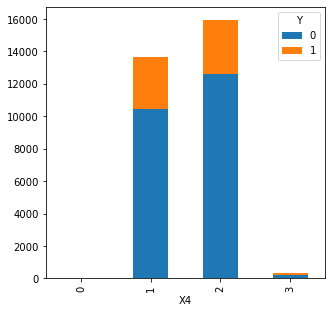

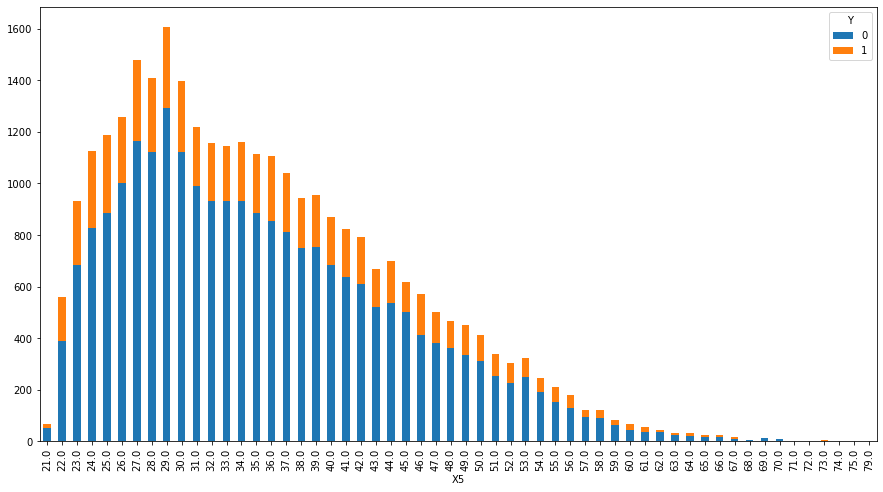

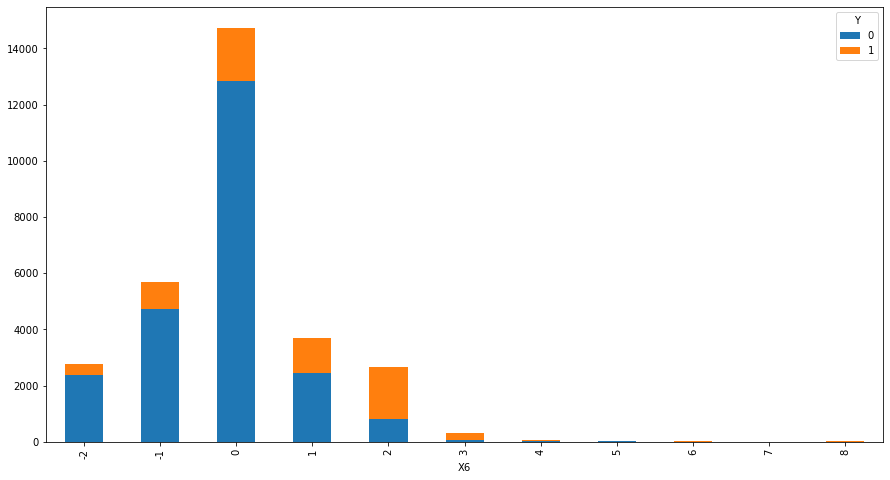

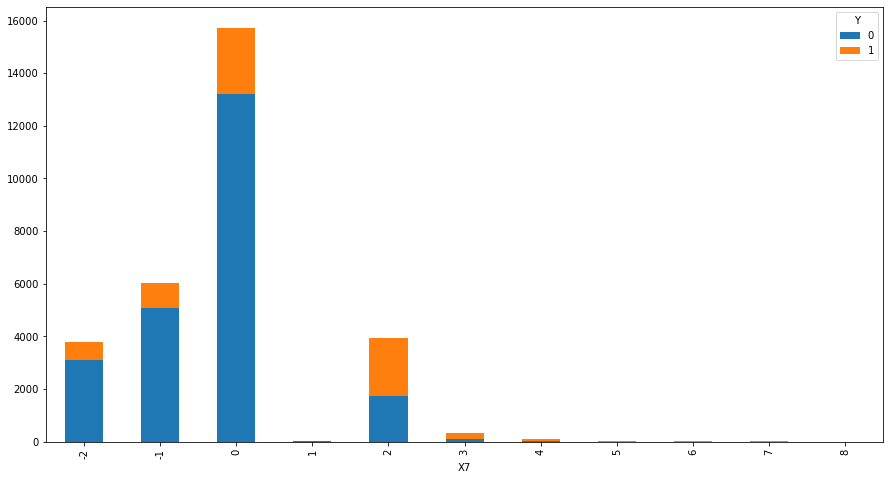

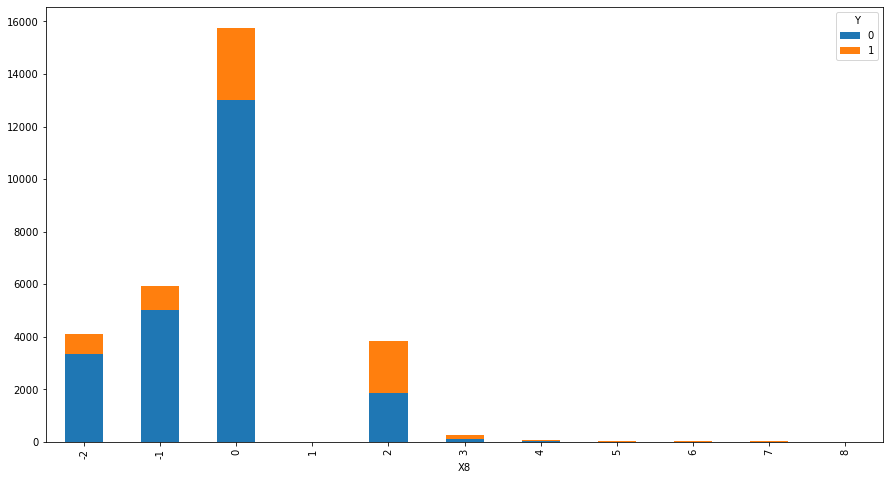

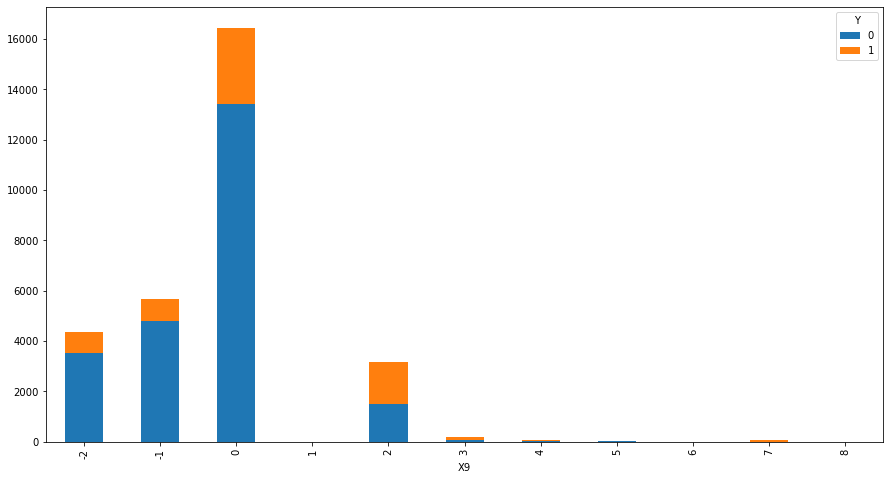

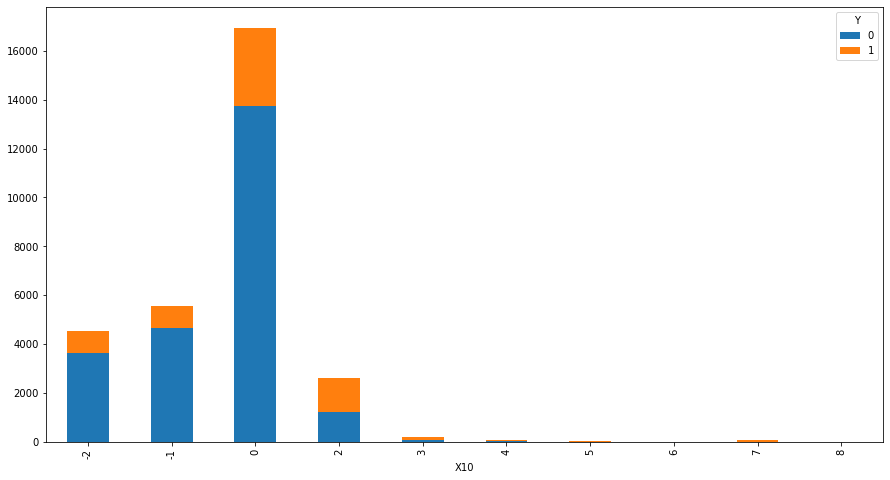

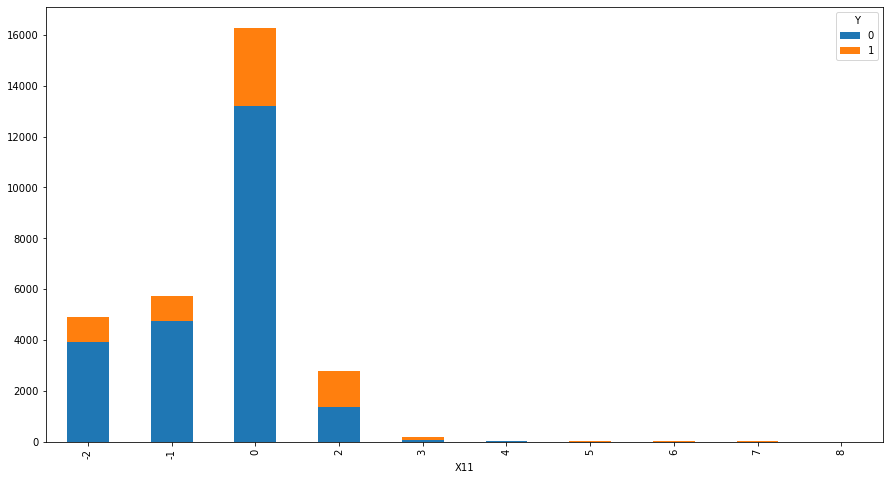

In [36]:
# Visualization

#Marital Status and default (or not)
tb1.plot(kind="bar", figsize=(5,5), stacked=True)

#Age and default (or not)
tb2.plot(kind="bar", figsize=(15,8), stacked=True)

#History of Past Payment (e.g. September) and default (or not)

tb3.plot(kind="bar", figsize=(15,8), stacked=True)
tb4.plot(kind="bar", figsize=(15,8), stacked=True)
tb5.plot(kind="bar", figsize=(15,8), stacked=True)
tb6.plot(kind="bar", figsize=(15,8), stacked=True)
tb7.plot(kind="bar", figsize=(15,8), stacked=True)
tb8.plot(kind="bar", figsize=(15,8), stacked=True)



As one can observe, the majority of the credit cardholders are married or single. The default rate is slightly higher on the married ones (23.47%) than in single clients (20.92%).

Also, it is represented the defaults (or not) across the age range. It is possible to observe that clients between 25 and 31 have more occurrences of default. Nonetheless, in relative terms, the elder people have higher percentage rates, although there’s not enough data in those age ranges.


In [37]:
tb2["sum"] = tb2.sum(axis=1)
tb2["percentage"] = tb2[1]/tb2["sum"]*100
tb2.sort_values("percentage", ascending = False).head(10)

Y       0    1  sum  percentage
X5                             
73.0    1    3    4   75.000000
61.0   35   21   56   37.500000
60.0   44   23   67   34.328358
75.0    2    1    3   33.333333
72.0    2    1    3   33.333333
67.0   11    5   16   31.250000
22.0  391  169  560   30.178571
64.0   22    9   31   29.032258
66.0   18    7   25   28.000000
46.0  413  157  570   27.543860

Numerical Variables

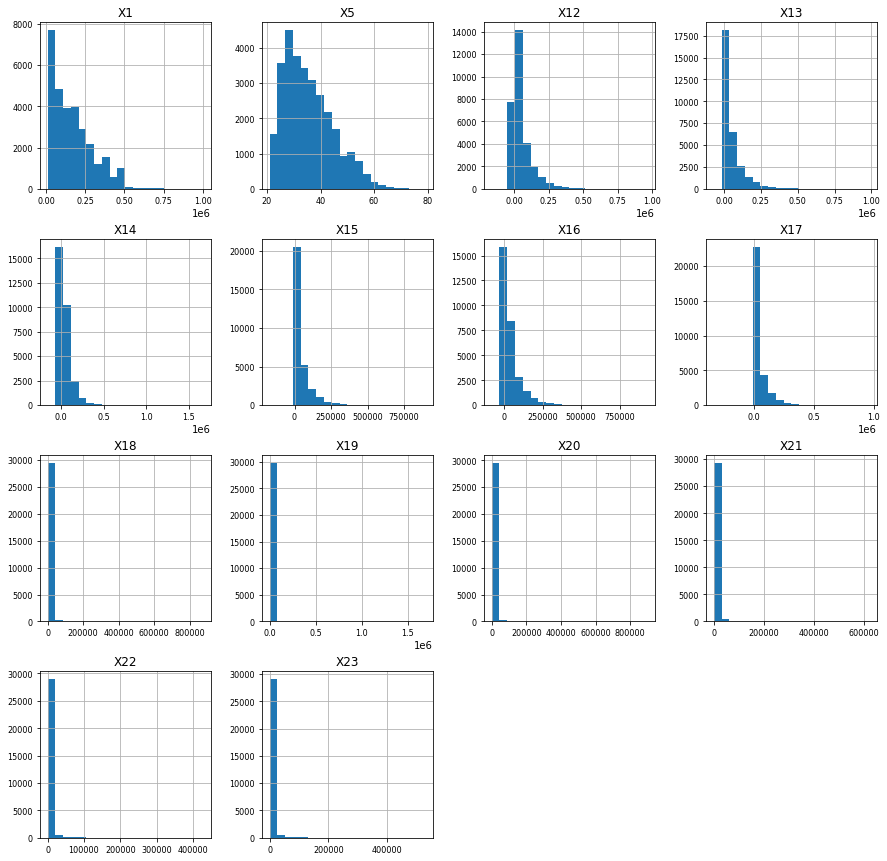

In [38]:
numerical=ds.select_dtypes(include=[np.number]).columns.tolist()
ds[numerical].hist(bins=20, figsize=(15, 15), layout=(4, 4), xlabelsize=8, ylabelsize=8);


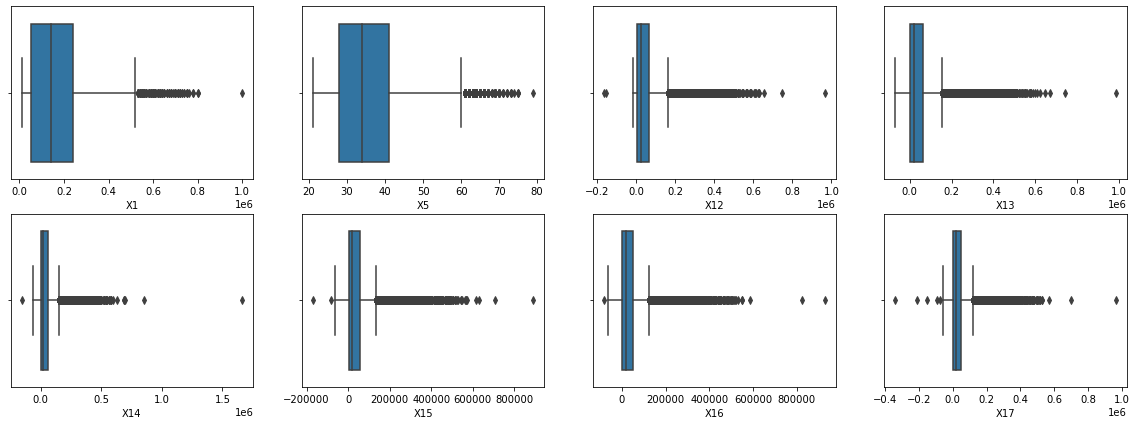

In [39]:
# Do boxplots on all numeric variables
fig, ax = plt.subplots(2, 4, figsize=(20, 7))
for var, subplot in zip(ds[numerical], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


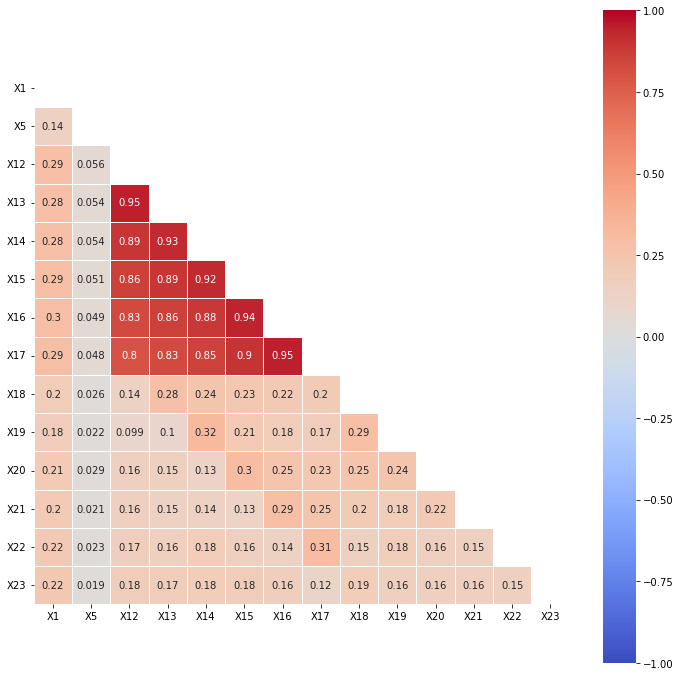

In [40]:
#Pearson Correlation only for numerical
corr = ds[numerical].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(12, 12))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})

#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 0)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

## Data Preparation LR

In [41]:
# Create a modeling dataset from the original dataset
X = ds.copy(deep=True)

In [42]:
# Drop Gender and Education (RGDP)

X.drop("X2", axis=1, inplace=True)  #Gender
X.drop("X3", axis=1, inplace=True)  #Education 
X = X.iloc[:,1:] 

#Group variables to reduce cardinality. Above delay of 4 months 
#X.loc[(X['X6'] == 5 )] == 4
#X.loc[(X['X7'] > 4)] == 4
#X.loc[(X['X8'] > 4)] == 4
#X.loc[(X['X9'] > 4)] == 4
#X.loc[(X['X10'] > 4)] == 4
#X.loc[(X['X11'] > 4)] == 
4
X

X1 X4    X5 X6 X7 X8 X9 X10 X11       X12  ...      X15      X16  \
1       20000.0  1  24.0  2  2 -1 -1  -2  -2    3913.0  ...      0.0      0.0   
2      120000.0  2  26.0 -1  2  0  0   0   2    2682.0  ...   3272.0   3455.0   
3       90000.0  2  34.0  0  0  0  0   0   0   29239.0  ...  14331.0  14948.0   
4       50000.0  1  37.0  0  0  0  0   0   0   46990.0  ...  28314.0  28959.0   
5       50000.0  1  57.0 -1  0 -1  0   0   0    8617.0  ...  20940.0  19146.0   
...         ... ..   ... .. .. .. ..  ..  ..       ...  ...      ...      ...   
29996  220000.0  1  39.0  0  0  0  0   0   0  188948.0  ...  88004.0  31237.0   
29997  150000.0  2  43.0 -1 -1 -1 -1   0   0    1683.0  ...   8979.0   5190.0   
29998   30000.0  2  37.0  4  3  2 -1   0   0    3565.0  ...  20878.0  20582.0   
29999   80000.0  1  41.0  1 -1  0  0   0  -1   -1645.0  ...  52774.0  11855.0   
30000   50000.0  1  46.0  0  0  0  0   0   0   47929.0  ...  36535.0  32428.0   

           X17      X18      X19      X20     X21      X22     X23  Y  
1          0.0      0.0    689.0      0.0     0.0      0.0     0.0  1  
2       3261.0      0.0   1000.0   1000.0  1000.0      0.0  2000.0  1  
3      15549.0   1518.0   1500.0   1000.0  1000.0   1000.0  5000.0  0  
4      29547.0   2000.0   2019.0   1200.0  1100.0   1069.0  1000.0  0  
5      19131.0   2000.0  36681.0  10000.0  9000.0    689.0   679.0  0  
...        ...      ...      ...      ...     ...      ...     ... ..  
29996  15980.0   8500.0  20000.0   5003.0  3047.0   5000.0  1000.0  0  
29997      0.0   1837.0   3526.0   8998.0   129.0      0.0     0.0  0  
29998  19357.0      0.0      0.0  22000.0  4200.0   2000.0  3100.0  1  
29999  48944.0  85900.0   3409.0   1178.0  1926.0  52964.0  1804.0  1  
30000  15313.0   2078.0   1800.0   1430.0  1000.0   1000.0  1000.0  1  

[30000 rows x 22 columns]

In [43]:
# Encode categorical variables to dummy variables
cols = ['X4','X6','X7','X8','X9','X10','X11']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
X = ce_one_hot.fit_transform(X)

In [44]:
X.head(10)

X1  X4_1.0  X4_2.0  X4_3.0  X4_0.0    X5  X6_2.0  X6_-1.0  X6_0.0  \
1    20000.0       1       0       0       0  24.0       1        0       0   
2   120000.0       0       1       0       0  26.0       0        1       0   
3    90000.0       0       1       0       0  34.0       0        0       1   
4    50000.0       1       0       0       0  37.0       0        0       1   
5    50000.0       1       0       0       0  57.0       0        1       0   
6    50000.0       0       1       0       0  37.0       0        0       1   
7   500000.0       0       1       0       0  29.0       0        0       1   
8   100000.0       0       1       0       0  23.0       0        0       1   
9   140000.0       1       0       0       0  28.0       0        0       1   
10   20000.0       0       1       0       0  35.0       0        0       0   

    X6_-2.0  ...       X15       X16       X17      X18      X19      X20  \
1         0  ...       0.0       0.0       0.0      0.0    689.0      0.0   
2         0  ...    3272.0    3455.0    3261.0      0.0   1000.0   1000.0   
3         0  ...   14331.0   14948.0   15549.0   1518.0   1500.0   1000.0   
4         0  ...   28314.0   28959.0   29547.0   2000.0   2019.0   1200.0   
5         0  ...   20940.0   19146.0   19131.0   2000.0  36681.0  10000.0   
6         0  ...   19394.0   19619.0   20024.0   2500.0   1815.0    657.0   
7         0  ...  542653.0  483003.0  473944.0  55000.0  40000.0  38000.0   
8         0  ...     221.0    -159.0     567.0    380.0    601.0      0.0   
9         0  ...   12211.0   11793.0    3719.0   3329.0      0.0    432.0   
10        1  ...       0.0   13007.0   13912.0      0.0      0.0      0.0   

        X21      X22      X23  Y  
1       0.0      0.0      0.0  1  
2    1000.0      0.0   2000.0  1  
3    1000.0   1000.0   5000.0  0  
4    1100.0   1069.0   1000.0  0  
5    9000.0    689.0    679.0  0  
6    1000.0   1000.0    800.0  0  
7   20239.0  13750.0  13770.0  0  
8     581.0   1687.0   1542.0  0  
9    1000.0   1000.0   1000.0  0  
10  13007.0   1122.0      0.0  0  

[10 rows x 83 columns]

### Modeling - Logistic regression

It is a supervised learning method used to predict the probability of a binary ([yes/no], [0/1]) event. In this example, it was used to solve a classification problem. It can be said that Logistic regression models are models of the log of the odds ratio.
In the example, it was proceeded to compute three times the logistic regression, the first with the data prepared, the second with oversampling to remove the imbalance and the third with under sampling to try to remove the imbalance too.

In [45]:
X

X1  X4_1.0  X4_2.0  X4_3.0  X4_0.0    X5  X6_2.0  X6_-1.0  \
1       20000.0       1       0       0       0  24.0       1        0   
2      120000.0       0       1       0       0  26.0       0        1   
3       90000.0       0       1       0       0  34.0       0        0   
4       50000.0       1       0       0       0  37.0       0        0   
5       50000.0       1       0       0       0  57.0       0        1   
...         ...     ...     ...     ...     ...   ...     ...      ...   
29996  220000.0       1       0       0       0  39.0       0        0   
29997  150000.0       0       1       0       0  43.0       0        1   
29998   30000.0       0       1       0       0  37.0       0        0   
29999   80000.0       1       0       0       0  41.0       0        0   
30000   50000.0       1       0       0       0  46.0       0        0   

       X6_0.0  X6_-2.0  ...      X15      X16      X17      X18      X19  \
1           0        0  ...      0.0      0.0      0.0      0.0    689.0   
2           0        0  ...   3272.0   3455.0   3261.0      0.0   1000.0   
3           1        0  ...  14331.0  14948.0  15549.0   1518.0   1500.0   
4           1        0  ...  28314.0  28959.0  29547.0   2000.0   2019.0   
5           0        0  ...  20940.0  19146.0  19131.0   2000.0  36681.0   
...       ...      ...  ...      ...      ...      ...      ...      ...   
29996       1        0  ...  88004.0  31237.0  15980.0   8500.0  20000.0   
29997       0        0  ...   8979.0   5190.0      0.0   1837.0   3526.0   
29998       0        0  ...  20878.0  20582.0  19357.0      0.0      0.0   
29999       0        0  ...  52774.0  11855.0  48944.0  85900.0   3409.0   
30000       1        0  ...  36535.0  32428.0  15313.0   2078.0   1800.0   

           X20     X21      X22     X23  Y  
1          0.0     0.0      0.0     0.0  1  
2       1000.0  1000.0      0.0  2000.0  1  
3       1000.0  1000.0   1000.0  5000.0  0  
4       1200.0  1100.0   1069.0  1000.0  0  
5      10000.0  9000.0    689.0   679.0  0  
...        ...     ...      ...     ... ..  
29996   5003.0  3047.0   5000.0  1000.0  0  
29997   8998.0   129.0      0.0     0.0  0  
29998  22000.0  4200.0   2000.0  3100.0  1  
29999   1178.0  1926.0  52964.0  1804.0  1  
30000   1430.0  1000.0   1000.0  1000.0  1  

[30000 rows x 83 columns]

In [46]:
# Create the Target
y = X['Y']

In [47]:
y = y.astype(int)

In [23]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=500)

In [24]:
# Remove the Target from the training
X_train = X_train.drop(['Y'],1)
X_test = X_test.drop(['Y'],1)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [25]:
# Dataframe for scaling
tempDF = X.copy(deep=True)
tempDF.drop(columns='Y', inplace=True)

# Normalize training/test data
scaler = MinMaxScaler(feature_range=(0, 1))
tempDF_scaled = scaler.fit_transform(tempDF)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Create object and train the model
classModel = LogisticRegression(random_state=123, max_iter=200)
classModel.fit(X_train_scaled, y_train)

#It's a logistic regression and the base is linear regression
#Parameters changed

LogisticRegression(max_iter=200, random_state=123)

### Evaluation - Logistic regression

In [27]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

#Function to print or create a dataframe with the matrix
#Now the measures are different: precision, recall, F1, AUC, etc (classification measures)

In [28]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled) 
y_pred_test = classModel.predict(X_test_scaled) 

In [29]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

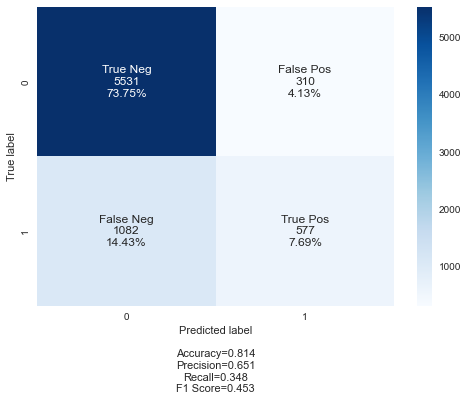

In [30]:
# Show the confusion matrix

#Results for the test DATA!!

cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#Show results of my confusion matrix

In [31]:
resultsDF_LR = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF_LR

Measure     Train      Test
0   ACCURACY  0.822533  0.814400
1  PRECISION  0.686223  0.650507
2     RECALL  0.364276  0.347800
3   F1 SCORE  0.475915  0.453260
4        AUC  0.658483  0.647363

In this first result, it was obtained a relatively good accuracy of 0,82 in the train and 0,81 in the test sample. The precision, recall and, as a result, the F1 Score were under the expected as described in the table.

### Modeling and evaluating - with oversampling to remove the imbalance

Counter({0: 17523, 1: 4977})


<AxesSubplot:xlabel='y', ylabel='count'>

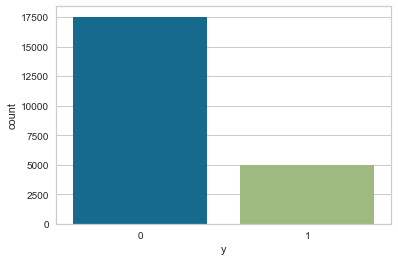

In [32]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train}), ax=ax)

Counter({1: 17523, 0: 17523})


<AxesSubplot:xlabel='y', ylabel='count'>

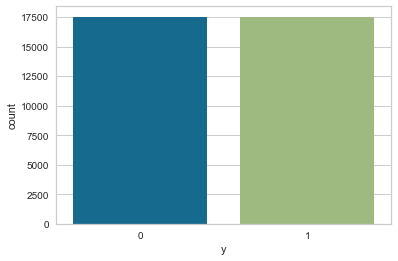

In [33]:
# Import package
from imblearn.over_sampling import SMOTE

# Applyting SMOTE to generare new instances (oversampling)
''' I want the classes to be on same level '''

sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train_scaled2, y_train2 = sm.fit_resample(X_train_scaled, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train2}), ax=ax)

In [34]:
# Train de model
classModel.fit(X_train_scaled2, y_train2)   #these X and Y "2" is from the oversampling code

# Predict values
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 

# Show performance results
resultsDF_LR_O = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)


# Compare the results
print(resultsDF_LR_O)

     Measure     Train      Test
0   ACCURACY  0.702648  0.772400
1  PRECISION  0.775570  0.487692
2     RECALL  0.570336  0.573237
3   F1 SCORE  0.657305  0.527016
4        AUC  0.702648  0.701102


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Our second approach (oversampling) did not perform better, especially in Accuracy and Precision. Although got a slightly better result in the Recall as well in the F1 score and AUC.

### Modeling and evaluating - with undersampling to remove the imbalance

Counter({0: 4977, 1: 4977})


Measure     Train      Test
0   ACCURACY  0.707253  0.772400
1  PRECISION  0.780680  0.487768
2     RECALL  0.576452  0.576854
3   F1 SCORE  0.663199  0.528583
4        AUC  0.707253  0.702397

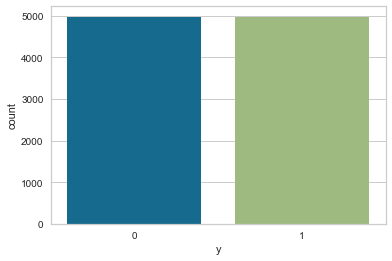

In [35]:
# Subset by class - creating a DF where target is 0 and in the line below where target is 1
ss_class_0 = pd.DataFrame(data=X_train_scaled[y_train == 0], index=X_train[y_train == 0].index)
ss_class_1 = pd.DataFrame(data=X_train_scaled[y_train == 1], index=X_train[y_train == 1].index)


'''Counting how much do I have on each class '''

# Do random under-sampling (the same 0's as the existing 1's)
count_class_0, count_class_1 = y_train.value_counts()
ss_class_0_under = ss_class_0.sample(count_class_1, replace=False)   #From class 0 get me a sample of Class 1
X_train_scaled3 = pd.concat([ss_class_0_under, ss_class_1], axis=0)   #Creating another training variable 
y_train3 = y_train[X_train_scaled3.index]

# Present results
print(collections.Counter(y_train3))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="y", data=pd.DataFrame(data={'y':y_train3}), ax=ax)


# Train de model
classModel.fit(X_train_scaled3, y_train3)

# Predict values
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled3) 
y_pred_test = classModel.predict(X_test_scaled) 

# Show performance results
resultsDF_LR_U = performanceMetricsDF(metrics, y_train3, y_pred_train, y_test, y_pred_test)
resultsDF_LR_U

Our Third approach (undersampling) got almost the same result when compared to the second method (oversampling) - the obtained performance metrics were very similar, although not sufficiently enough to perform a good prediction for the data. As an initial conclusion we could infer that the Logistic regression did not fit well to predict our target in our data.

In [36]:
# Check AUC
FP,TP,thresholds = metrics.roc_curve(y_test,classModel.decision_function(X_test_scaled))
print("AUC:{}".format(metrics.auc(FP, TP))) # AUC of ROC

AUC:0.7584356968609276


In [37]:
type(X_test_scaled)

numpy.ndarray

0.7586220387847821

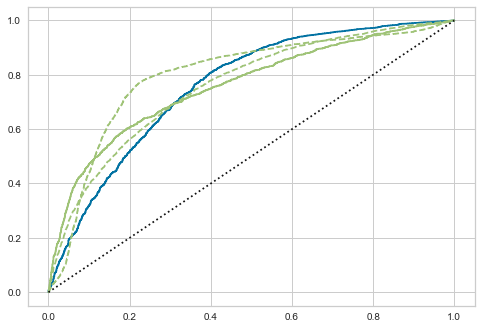

In [38]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled3, y_train)
visualizer.score(X_test_scaled, y_test)
#visualizer.show()

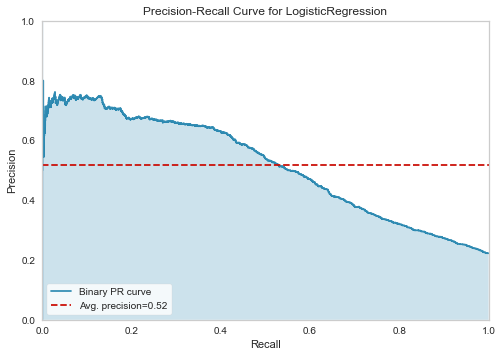

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [39]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled3, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

In [40]:
# Show 10 top features coefficients
abs_coef = np.concatenate(np.abs(classModel.coef_))
sorted_index = np.argsort(abs_coef)[::-1] # sort indices
top_10 = sorted_index[:10]
top_10DF = pd.DataFrame(data={'feature': list(X_train.columns[top_10]), 'coef': abs_coef[top_10]})
top_10DF

feature      coef
0       X1  2.214099
1      X18  1.506368
2      X23  1.421225
3   X6_3.0  1.300599
4   X6_0.0  1.265006
5  X6_-2.0  1.226848
6   X9_4.0  1.200166
7      X19  1.137436
8   X9_5.0  1.034586
9   X6_2.0  0.991765

### Modeling - Support Vector Machine (SVM)

SVM is a supervised Machine Learning Algorithm that is widely used both for regression and classification models. In a simple way, the SVM algorithm consists on plotting each item as a point in a space with the same number of dimensions as features. The value of each feature is a certain coordinate. The classification is made by finding a boundary that differentiates the two classes clearly.

In [41]:
# Create object and train the model
classModel = svm.SVC(gamma='scale', random_state=123, probability=True)
classModel.fit(X_train_scaled2, y_train2)

SVC(probability=True, random_state=123)

### Evaluation - SVM

In [42]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled)

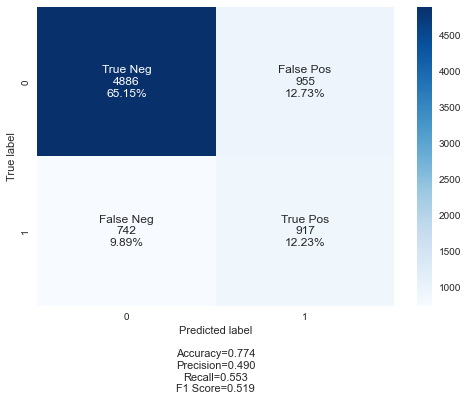

In [43]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [44]:
# Show performance results
resultsDF_SVM = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF_SVM

Measure     Train      Test
0   ACCURACY  0.724048  0.773733
1  PRECISION  0.805906  0.489850
2     RECALL  0.590253  0.552743
3   F1 SCORE  0.681424  0.519400
4        AUC  0.724048  0.694622

As one can observe from the table above, the model did not achieve very good results. Not only the obtained measures are very different between the train and test sets, but also the results themselves are very low. Precision is the highest performance measure obtained using the train set, although, when faced to the unseen observation of the test set, the model was not able to be consistent and the precision decreased severely. 

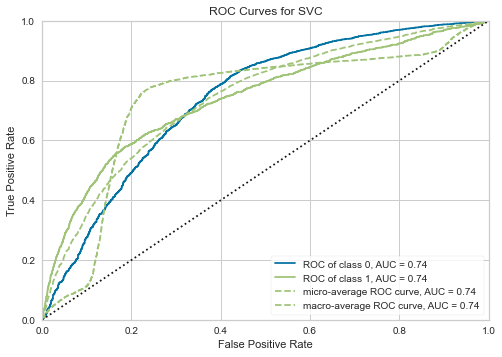

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [45]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

Using the ROC curve (and AUC), it is possible to visually reach the same conclusions already explored above: the AUC is relatively low, despite being higher than in other models. This means that the model is predicting 0s as 1s and 1s as 0s.

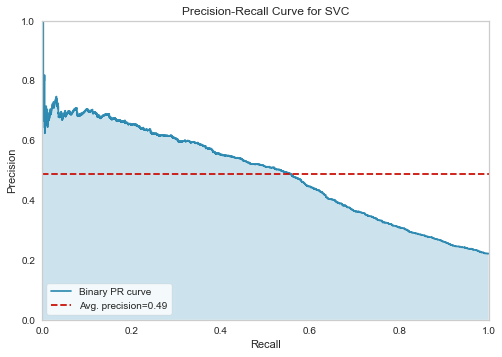

<AxesSubplot:title={'center':'Precision-Recall Curve for SVC'}, xlabel='Recall', ylabel='Precision'>

In [46]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

Finally, the precision-recall curve was computed, in which it is shown the tradeoff between precision and recall for different thresholds. The desirable result is to obtain a high area under the curve thus meaning the model obtained both high recall and high precision, in other words, a low false positive rate and a low false negative rate. The curve obtained using the SVM algorithm reinforces the fact that both measures obtained are relatively low.

### Modeling - KNN

The K-Nearest Neighbours assumes that similar things exist near each other. This model is considered one of the easiest to implement and can be very useful in classification problems, since it can easily identify the class of a particular data point. When selecting the number of K neighbours and the distance between data points is calculated, by assuming the similarity between a new data point and already available data, the KNN model is able to select the class most similar within the available ones. 

This model does not learn using the training data, simply because the algorithm stores the datasets and performs the classification task when new data is available. 

In [47]:
# Create object and train the model
classModel = KNeighborsClassifier(n_neighbors=5)
classModel.fit(X_train_scaled2, y_train2) # train the model (not training in reality)

KNeighborsClassifier()

### Evaluation - KNN

In [48]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 

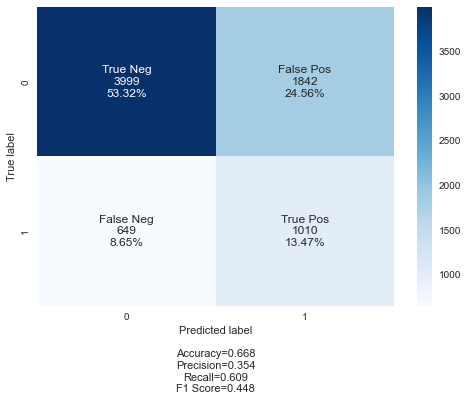

In [49]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Looking at the confusion matrix, one can see that out of the training dataset , 77,88 % of clients did not default and 22,12% defaulted the next month. Of the percentage of clients that did not default, this model correctly identified 53,32%. However, out of the percentage of clients that defaulted, the model correctly identified only 13,47%. 

In [50]:
# Show performance results
resultsDF_KNN = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF_KNN

Measure     Train      Test
0   ACCURACY  0.856075  0.667867
1  PRECISION  0.807471  0.354137
2     RECALL  0.935114  0.608800
3   F1 SCORE  0.866617  0.447794
4        AUC  0.856075  0.646722

Precision answers the question of what proportion of positive identifications was actually correct. Our model has a prediction of 0,354, meaning that when it predicts if a client will default in the following month, it is correct 35,4% of the time. Recall, on the other hand, tells us what proportion of actual positives were identified correctly: with a recall result of 0,61, the models identifies 61% of the clients that defaulted the next month.  

The accuracy showed poor results from the train to the test dataset, with a possible explanation being the number of chosen neighbours. When the model is only selecting values closer to the data sample it is creating a more complex decision boundary for classification, therefore having more difficulty in presenting a correct generalization on the test dataset.

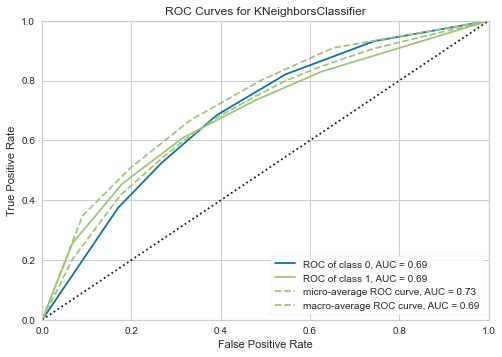

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [51]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

Finding the optimal number of neighbours is very important for this model, since it depends on it to correctly classify the test data set. 

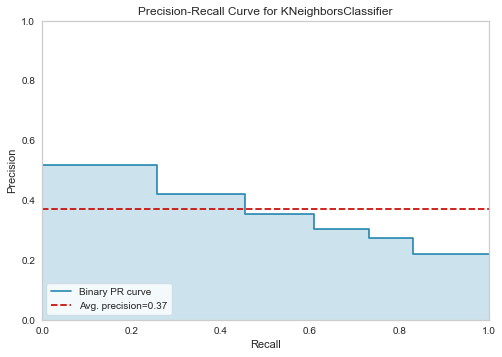

<AxesSubplot:title={'center':'Precision-Recall Curve for KNeighborsClassifier'}, xlabel='Recall', ylabel='Precision'>

In [52]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

#### Assessing the number of Neighbours

Based on the following website: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/#evaluatingthealgorithm

Text(0, 0.5, 'Mean Error')

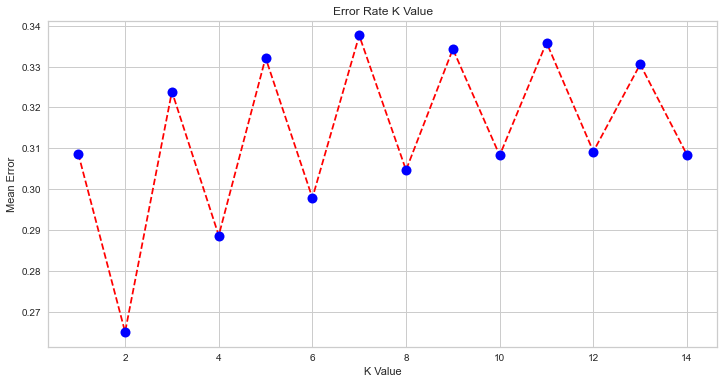

In [53]:
error = []

# Calculating mean error for K values between 1 and 15
for i in range(1, 15):
    classModel = KNeighborsClassifier(n_neighbors=i)
    classModel.fit(X_train_scaled2, y_train2)
    pred_i = classModel.predict(X_test_scaled) 
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Since when using this model, the value of k neighbours that will yield the best results for the dataset is unknown, a graph for the mean error rate of the data set (predicted values of test set) for each value of K (between 1 and 15) was plotted. The values with the smaller mean error should be the ones to consider and test how it impacts the accuracy, precision and recall of the test dataset.

### Modeling - NN

Neural Networks is a useful model in recognizing underlying patterns between input and output variables, especially nonlinear and complex relationships, using clustering and classification to learn and improve. A simple NN can be described as a set of layers composed by individual neurons, each one with  inputs, an activation function (one of the most used is the sigmoid function, that transforms neuron to a value between 0 and 1), and an output. In the majority of models, NN can be very complex and have many hidden layers.

Experimentation and changing parameters are crucial in neural networks, such as the number of neurons in each hidden layer, stopping criteria, learning rate etc, since the main challenge in the training is making sure you can get to a minimum error solution. Only by experimenting, you can find better solutions and make sure you have not reached a local minimum instead of a global minimum, as desired. 

In [54]:
# Create object and train the model
classModel = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=123, max_iter=500)
classModel.fit(X_train_scaled2, y_train2)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=500,
              random_state=123, solver='lbfgs')

### Evaluation - NN

In [55]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled)

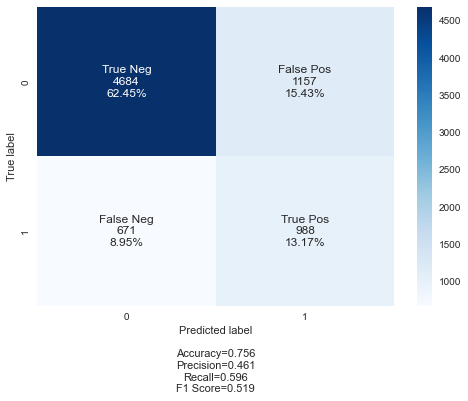

In [56]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

This model achieved an accuracy of 75,8%, although a high accuracy value does not necessarily indicate the model is good.  When interpreting the confusion matrix, one can see that of the percentage of clients that defaulted, the model identified 13,09%, where for the clients that did not default, it identifies 62,72%. 

In [57]:
resultsDF_NN = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF_NN

Measure     Train      Test
0   ACCURACY  0.720539  0.756267
1  PRECISION  0.772244  0.460606
2     RECALL  0.625578  0.595539
3   F1 SCORE  0.691216  0.519453
4        AUC  0.720539  0.698728

When this model predicts that a client will default, it presents a correct result 46,34% of the time, although it only identifies 59,19% of the clients that will actually default in the following month. The accuracy increased from train to the test data and the precision dropped considerably. Both Recall, AUC and F1 Score got a slightly smaller results in the test data set.

### Modeling - NB

It is a classification algorithm for binary (two-class) and multi-class classification problems. The name “Naïve” assumes inputs as independent given the target value. That assumption performs well on data where this assumption does not hold. It works by calculating the probability of each class in the train dataset, then calculate the distance to neighbors and calculate the respective probabilities. The interpretation is based as a percentage of an input, as much higher the target level distribution, this means that feature is important.

In [58]:
# Create object and train the model

X_train2, y_train2 = sm.fit_resample(X_train, y_train)

classModel = GaussianNB()
classModel.fit(X_train2, y_train2)

GaussianNB()

### Evaluation - NB

In [59]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train2) 
y_pred_test = classModel.predict(X_test) 

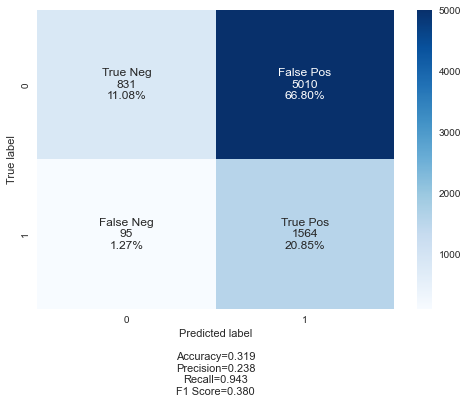

In [60]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [61]:
resultsDF_NB = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF_NB

Measure     Train      Test
0   ACCURACY  0.547937  0.319333
1  PRECISION  0.526692  0.237907
2     RECALL  0.945900  0.942737
3   F1 SCORE  0.676627  0.379934
4        AUC  0.547937  0.542503

In our model, the Naïve Bayes technique did not get good results on predicting our target. The accuracy on the test set was only 0,3193, the precision 0,2379, F1 score of 0,3799 and AUC of 0,5425. We could make an emphasis on the Recall that got a result of 0,9427 on the test set.

X does not have valid feature names, but GaussianNB was fitted with feature names


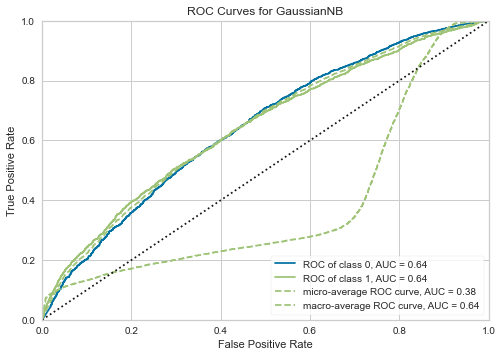

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [62]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train2, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### Modeling - DT

As in the regression assignment, the Decision Tree Model was also implemented. Since this is a classification problem the outcome of the DT will be, in this case, the mode response of the observations falling in the region of the tree, instead of the mean.
Firstly, the parameters implemented were only the maximum depth (4) and the random state.


In [63]:
# Create object and train the model
classModel = tree.DecisionTreeClassifier(max_depth=4, random_state=123)
classModel.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=4, random_state=123)

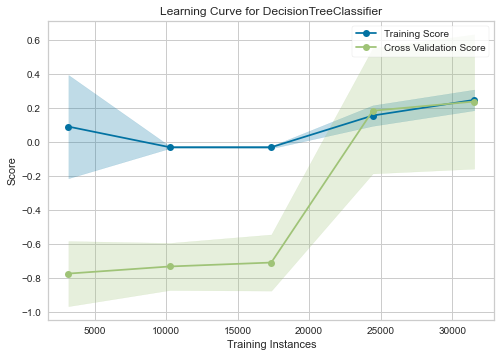

<AxesSubplot:title={'center':'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [64]:
# Plot the learning curve
cv = 10
sizes = np.linspace(0.1, 1.0, 5)
visualizer = LearningCurve(estimator=classModel, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=4, random_state=123)
visualizer.fit(X_train2, y_train2)
visualizer.show()   

By increasing the training instances, the gap between the Cross Validation Score and the Training Score decreases. Also from the 25,000 to 30,000 instances the scores are nearly the same although with a slightly increase. 

In [65]:
# Explore feature importance (Gini importance - normalized)
formattedList = [float(format(member,'.6f')) for member in classModel.feature_importances_]
formattedList2 = [abs(float(format(member,'.6f'))) for member in classModel.feature_importances_]
data_tuples = list(zip(X.columns,formattedList,formattedList2))
coeff_df = pd.DataFrame(data=data_tuples, columns=['Feature','Coefficient','AbsCoefficient'])
coeff_df.reset_index(drop=True, inplace=True)
coeff_df.sort_values(by=['AbsCoefficient'], inplace=True, ascending=False)
coeff_df

Feature  Coefficient  AbsCoefficient
8    X6_0.0     0.346000        0.346000
7   X6_-1.0     0.200460        0.200460
9   X6_-2.0     0.198959        0.198959
10   X6_1.0     0.149475        0.149475
1    X4_1.0     0.034302        0.034302
..      ...          ...             ...
29   X8_0.0     0.000000        0.000000
28  X8_-1.0     0.000000        0.000000
27   X7_8.0     0.000000        0.000000
26   X7_6.0     0.000000        0.000000
81      X23     0.000000        0.000000

[82 rows x 3 columns]

The repayment status features in September (X6) have the higher coefficient Gini importance to the Model, meaning that the most recent repayment status available have the highest impact when predicting if a customer will default or not, in the following month.

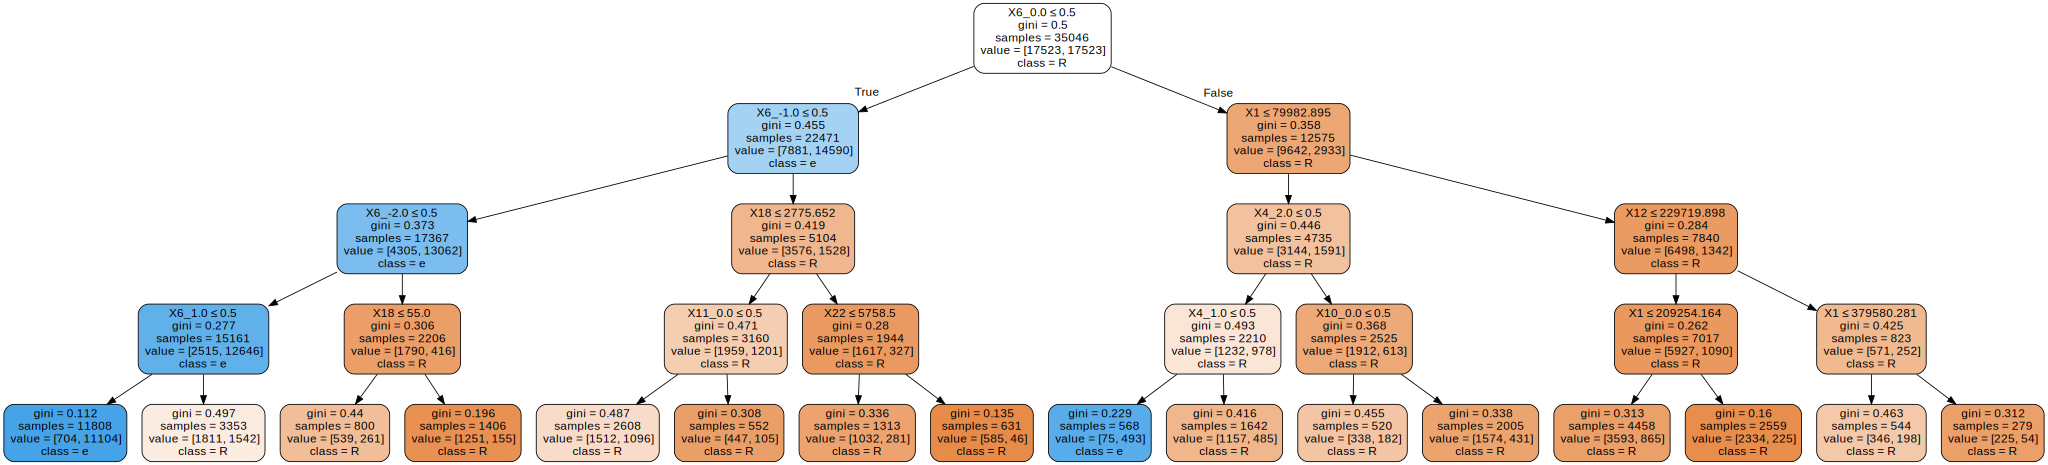

In [66]:
# Ploting the tree

dot_data = tree.export_graphviz(classModel, out_file=None, 
                      feature_names=list(X_train.columns),  
                      class_names='Returns',  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Evaluation - DT

In [67]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train2) 
y_pred_test = classModel.predict(X_test)

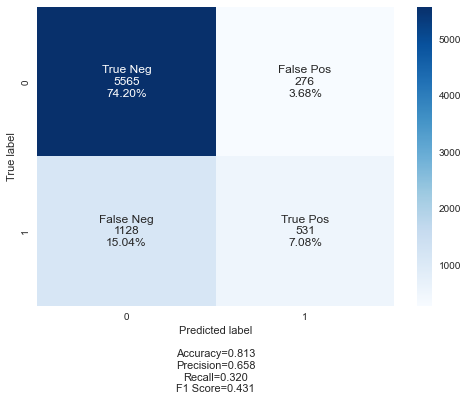

In [68]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [69]:
resultsDF_DT = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF_DT

Measure     Train      Test
0   ACCURACY  0.808680  0.812800
1  PRECISION  0.937056  0.657993
2     RECALL  0.661816  0.320072
3   F1 SCORE  0.775745  0.430657
4        AUC  0.808680  0.636410

In terms of accuracy, this model achieves significant results, both in the training and in the test set, being one of the top accurate models between the ones implemented. Although achieving precise results in the training set (93,7%), when faced to the test set, this measure reduces significantly, which can be a sign of overfitting. The same was verified in Recall and F1 Score values. Since the Recall is relatively low and inferior to Precision, it indicates a significant presence of False Negatives, meaning that the model classified a considerable number of clients as not defaulting in the following month, when in reality, the data states otherwise. 

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


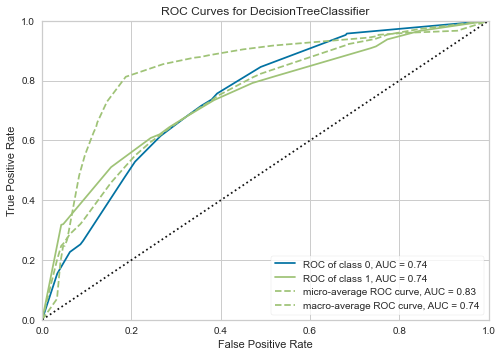

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [70]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train2, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Overall and considering the AUC and the ROC curve to compare the performance of Decision Tree Model with the other implemented approaches, it is possible to conclude that the Decision Tree produced a somewhat good score in terms of AUC in the training set, however a poor result in the test set.

### Modeling - RF

The Random Forest is an ensemble model. It is associated with the bagging algorithm with the following modification: instead of the following decision tree being created with the previous bootstrapped sample, which considers all features as candidate variables, it only selects a random number of variables.
The Random Forest algorithm from the sklearn ensemble models was parametrized with 100 trees (in the forest), with the maximum of depth being 3. It was also assigned a random state.


In [71]:
# Create object and train the model
classModel = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=123)
classModel.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=3, random_state=123)

### Evaluation - RF

In [72]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train2) 
y_pred_test = classModel.predict(X_test) 

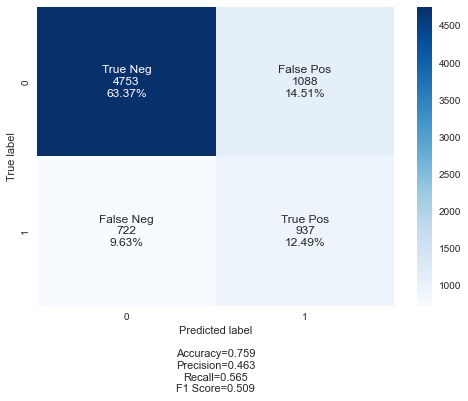

In [73]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [74]:
resultsDF_RF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF_RF

Measure     Train      Test
0   ACCURACY  0.791674  0.758667
1  PRECISION  0.810624  0.462716
2     RECALL  0.761171  0.564798
3   F1 SCORE  0.785119  0.508686
4        AUC  0.791674  0.689264

By observing the model results it is possible to infer that it produced relatively accurate results both in the training and in the test set, meaning that overall produced approximately ¾ of corrected predictions.
In terms of precision, there’s an evident discrepancy between the results of the training and the test set. This means that in the training set, the Random Forest Model captured a reasonable number of credit card clients’ default, among the ones who were classified as defaults. In the test set, this situation wasn’t verified which highlights the presence of False Positives classification (Type I Error).
The same situation was observed in the Recall evaluation method – big discrepancy between the train and test set results. The 56% obtained in the test set emphasizes the presence of false negatives (Type II Error).
Since the F1-Score can be viewed as the harmonic mean of precision and recall, the same behavior was observed between the train and test set.


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


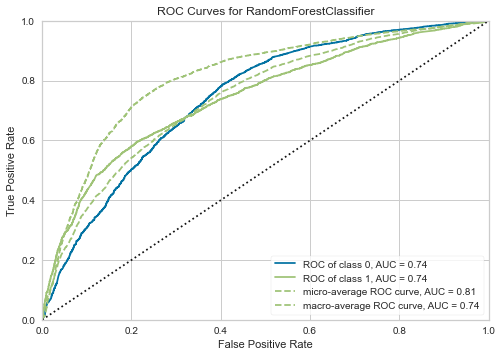

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [75]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train2, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Considering the results for the AUC, which is the area under the ROC curve, this model achieved a value of nearly 80% in the training set, with a decrease of approximately 10 percentage points in the training set. As stated previously, there’s evidence of a higher presence of false positives and false negatives in the test set, which translates into a lower AUC in the test set.

In [76]:
# Get feature importance
importance = list(classModel.feature_importances_)
# Create tuples with variable and value
feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importance)]
# Sort in descend order
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True)
fi_results = pd.DataFrame(data=feature_importance, columns=['Feature', 'Importance'])
fi_results.head(10)

Feature  Importance
0   X6_0.0        0.17
1   X7_0.0        0.10
2   X8_0.0        0.06
3   X9_0.0        0.05
4   X4_2.0        0.04
5  X6_-1.0        0.04
6  X7_-1.0        0.04
7       X1        0.03
8   X6_2.0        0.03
9  X7_-2.0        0.03

<BarContainer object of 10 artists>

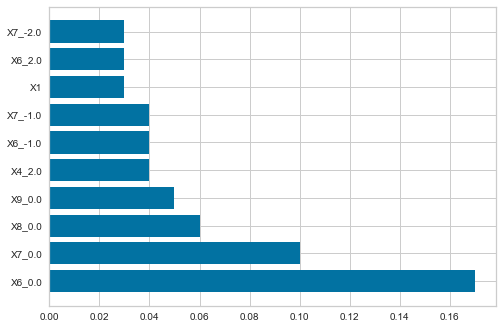

In [77]:
plt.barh(fi_results['Feature'].head(10),fi_results['Importance'].head(10))

In order to obtain some interpretability, it was implemented the feature importance algorithm (also known as Gini importance) from the scikit-learn package. By applying this algorithm it is possible to observe that the most relevant features are the ones related with repayment status being on time in September, August, July and June being, with the outstanding variables representing very low or non-existing importance.

### Modeling - X Gradient Boosting

XGB is an ensamble machine learning algorithm based on the decision tree algorithm. These decision tree algorithms are considered to be one of the best when dealing with structured data. XGB is a more powerfull gradient boost where the errors are minimized by gradient descent algorithm.

In [78]:
# Create object and train the model
classModel = xgboost.XGBClassifier(n_estimators=300,
                           subsample=0.9,
                           colsample_bytree=0.9,
                           max_depth=3,
                           eval_metric='error',
                           seed=123,
                           scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1],
                           use_label_encoder=False,
                           )
classModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='error', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=3.5207956600361663, seed=123, subsample=0.9,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

### Evaluation - X Gradient Boosting

In [79]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train2) 
y_pred_test = classModel.predict(X_test) 

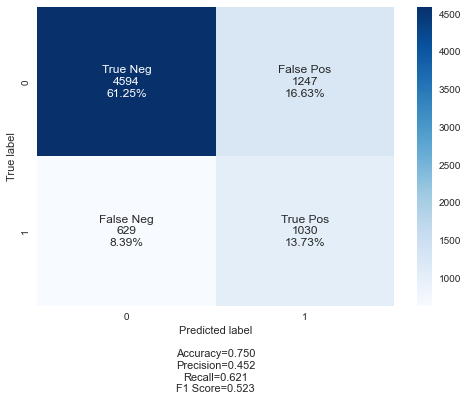

In [80]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [81]:
resultsDF_XGB = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF_XGB

Measure     Train      Test
0   ACCURACY  0.720225  0.749867
1  PRECISION  0.783875  0.452350
2     RECALL  0.608115  0.620856
3   F1 SCORE  0.684899  0.523374
4        AUC  0.720225  0.703683

The measures obtained using the XGBoost algorithm are somewhat better than the makority of other models. The precision, accuracy and AUC obtained with the train set are not bad although, as it is easy to observe, there results are much different from the ones obtained using the test set. This clearly shows us that oversampling is present.

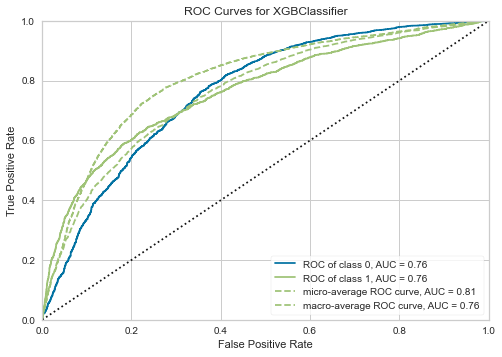

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [82]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train2, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Using the ROC curve (and AUC), it is possible to visually reach the same conclusions already explored above: the AUC is higher than the one obtained from other models. Although, when faced with new observations (test set), the model decreased its performance.

### Modeling - Shapley

By using the Shapley values, one is trying to interpret the model through the understanding of the individual features’ contribution to the output and their interactions.

In [83]:
# Creating Shap
explainer = shap.TreeExplainer(classModel)
shap_values = explainer.shap_values(X_train, y=y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


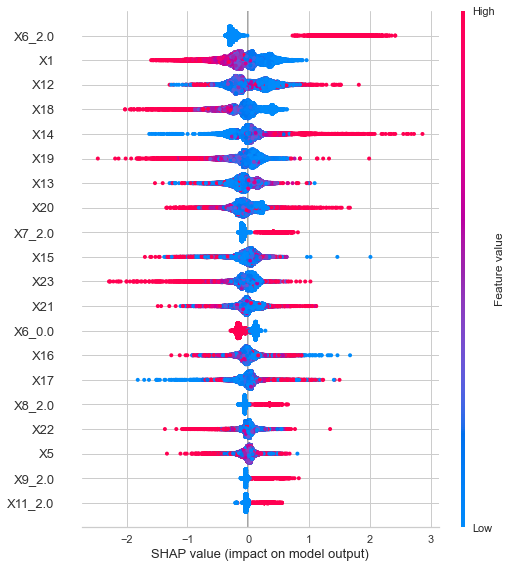

In [84]:
# Shap summary
shap.summary_plot(shap_values, X_train)

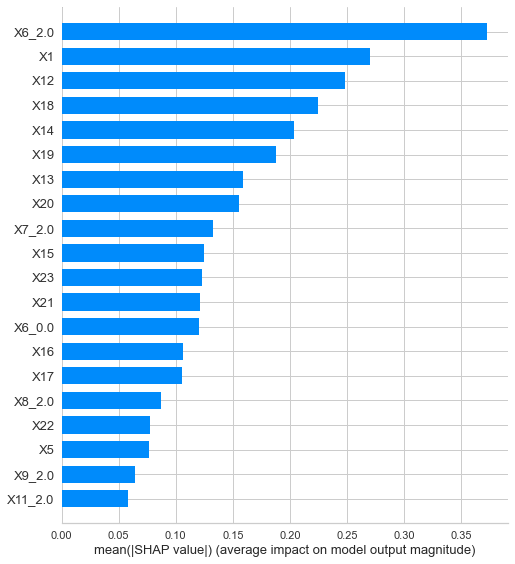

In [85]:
# Mean importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

By visualizing the summary plots, the variable with the highest importance is the repayment status in September with 2 months delay (which is also visible in other models). The variable with the highest dispersion, meaning with higher extreme values on the x-axis, is the feature X14: The amount of bill statement in July. This might be related to the initial assessment of the data, which relates the amount of bill statement in July and the holidays’ spending. Hence, a person with a higher or lower bill statement in July, will have a significant impact on the model’s prediction. 

In [86]:
# Visualizing some of instances (first 100)
# Interact with menu to explore the results
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:100,:], X_train.iloc[:100,:])

In [87]:
# Visualizing one instance only (first customer - index 0)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

Overall, this instance contributes negatively to the default classification. It is possible to observe the feature’s impact on the prediction (-0.07). In red it is represented the features that contribute negatively to default and in blue the positive contribution. 
As it has been seen, the X6_2 (Repayment status in September being 2 month delay) is the feature with the highest importance, and in this example, has a value of 0. So, makes sense the rationale of this instance contributing negatively to the classification of default.


# Hyper tunning

## Neural Networks (NN)

In [88]:
# Create object and train the model with different parameters
classModel = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2),learning_rate='adaptive', random_state=123, max_iter=200)
classModel.fit(X_train_scaled2, y_train2)

# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


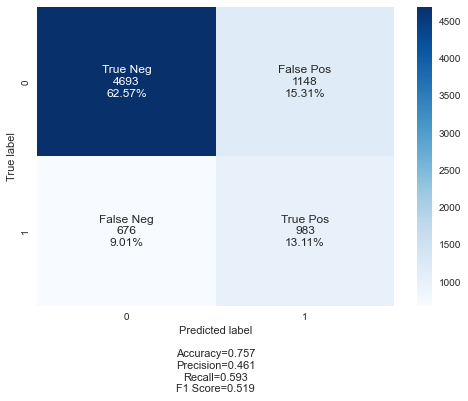

In [89]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')


In [90]:
resultsDF_NN_HT = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
display(f"NN results with Hyper tunning",resultsDF_NN_HT,f"Inicial NN results",
      resultsDF_NN)

'NN results with Hyper tunning'

Measure     Train      Test
0   ACCURACY  0.719340  0.756800
1  PRECISION  0.774477  0.461286
2     RECALL  0.618901  0.592526
3   F1 SCORE  0.688004  0.518734
4        AUC  0.719340  0.697992

'Inicial NN results'

Measure     Train      Test
0   ACCURACY  0.720539  0.756267
1  PRECISION  0.772244  0.460606
2     RECALL  0.625578  0.595539
3   F1 SCORE  0.691216  0.519453
4        AUC  0.720539  0.698728

## Naive Bayes (NB)

Based on the following website https://www.kaggle.com/code/akshaysharma001/naive-bayes-with-hyperpameter-tuning/notebook

In [116]:
X_train2, y_train2 = sm.fit_resample(X_train, y_train)

classModel = GaussianNB()
classModel.fit(X_train2, y_train2)

GaussianNB()

In [117]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=classModel, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test)

divide by zero encountered in log


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [118]:
param_NB = pd.DataFrame(gs_NB.cv_results_['params'])
param_NB['test_score'] = gs_NB.cv_results_['mean_test_score']


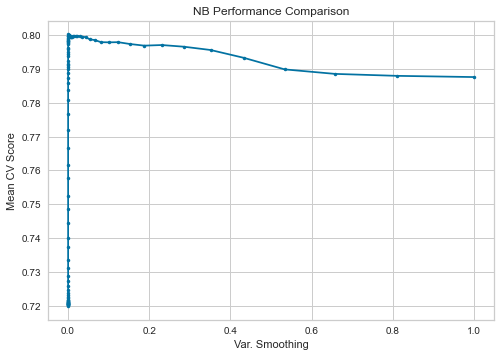

In [119]:
plt.plot(param_NB['var_smoothing'], param_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [120]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8006666666666666


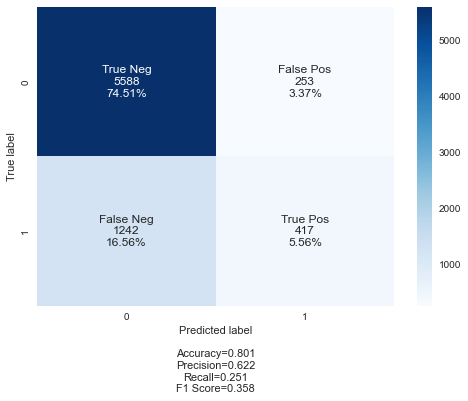

In [121]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train2) 
y_pred_test = classModel.predict(X_test) 

# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,predict_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [122]:
#Results

resultsDF_NB_HT = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, predict_test)
display(f"NB results with Hyper tunning",resultsDF_NB_HT,f"Inicial NB results",
      resultsDF_NB)

'NB results with Hyper tunning'

Measure     Train      Test
0   ACCURACY  0.547937  0.800667
1  PRECISION  0.526692  0.622388
2     RECALL  0.945900  0.251356
3   F1 SCORE  0.676627  0.358094
4        AUC  0.547937  0.604021

'Inicial NB results'

Measure     Train      Test
0   ACCURACY  0.547937  0.319333
1  PRECISION  0.526692  0.237907
2     RECALL  0.945900  0.942737
3   F1 SCORE  0.676627  0.379934
4        AUC  0.547937  0.542503

## K-Nearest Neighbours (KNN)

Changing the number of neighbours to 2, to assess if the model outperforms the initial one, based on the error rate K value.


In [98]:
# Create object and train the model
classModel = KNeighborsClassifier(n_neighbors=2)
classModel.fit(X_train_scaled2, y_train2) # train the model (not training in reality)

# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 

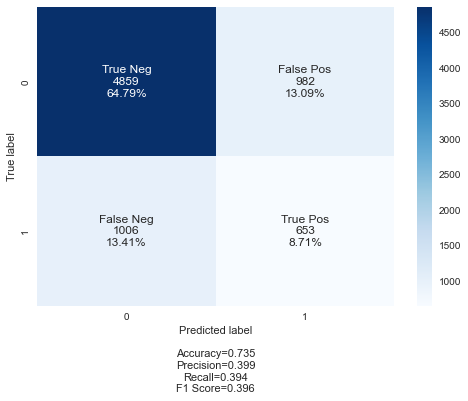

In [99]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [100]:
# Show performance results
resultsDF_KNN_HT_2 = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF_KNN_HT_2

Measure     Train      Test
0   ACCURACY  0.955630  0.734933
1  PRECISION  1.000000  0.399388
2     RECALL  0.911259  0.393611
3   F1 SCORE  0.953570  0.396478
4        AUC  0.955630  0.612744

Changing the number of neighbours to 4, to compare with K=2 model.

In [101]:
# Create object and train the model
classModel = KNeighborsClassifier(n_neighbors=4)
classModel.fit(X_train_scaled2, y_train2) # train the model (not training in reality)

# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 

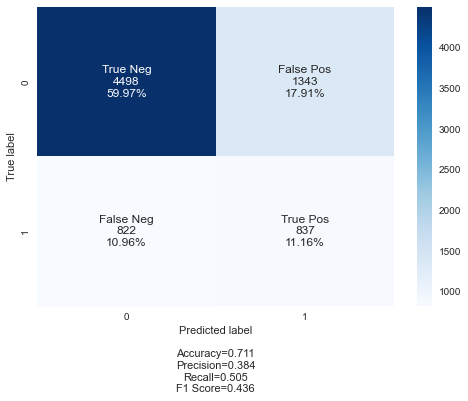

In [102]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [103]:
# Show performance results
resultsDF_KNN_HT_4 = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF_KNN_HT_4

Measure     Train      Test
0   ACCURACY  0.888889  0.711333
1  PRECISION  0.885109  0.383945
2     RECALL  0.893797  0.504521
3   F1 SCORE  0.889432  0.436051
4        AUC  0.888889  0.637297

Given both results, the optimal chosen K to implement in the Hyper Tunning section is 4. 

## Decision Tree (DT)

Trying to change some parameters to achieve better results.
splitter = random (trying to reduce overfitting)
max_depth = increase to 6, although it reduces interpretability
min_samples_leaf = 4 (minimum samples at a leaf node) 

### Modeling and Evaluation DT

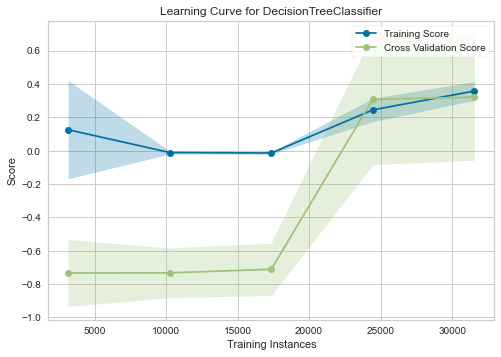

<AxesSubplot:title={'center':'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [104]:
X_train2, y_train2 = sm.fit_resample(X_train, y_train)

# Create object and train the model with different parameters
classModel_HT = tree.DecisionTreeClassifier(max_depth=6, random_state=123, min_samples_leaf=4, splitter='random')
classModel_HT.fit(X_train2, y_train2)

# predict y for X_train and X_test
y_pred_train = classModel_HT.predict(X_train2) 
y_pred_test = classModel_HT.predict(X_test)

# Plot the learning curve
cv = 10
sizes = np.linspace(0.1, 1.0, 5)
visualizer = LearningCurve(estimator=classModel_HT, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=4, random_state=123)
visualizer.fit(X_train2, y_train2)
visualizer.show()  

Slightly increase in the score values

In [105]:
# Explore feature importance (Gini importance - normalized)
formattedList = [float(format(member,'.6f')) for member in classModel_HT.feature_importances_]
formattedList2 = [abs(float(format(member,'.6f'))) for member in classModel_HT.feature_importances_]
data_tuples = list(zip(X.columns,formattedList,formattedList2))
coeff_df = pd.DataFrame(data=data_tuples, columns=['Feature','Coefficient','AbsCoefficient'])
coeff_df.reset_index(drop=True, inplace=True)
coeff_df.sort_values(by=['AbsCoefficient'], inplace=True, ascending=False)
coeff_df


Feature  Coefficient  AbsCoefficient
8    X6_0.0     0.298925        0.298925
7   X6_-1.0     0.173187        0.173187
9   X6_-2.0     0.171890        0.171890
10   X6_1.0     0.129138        0.129138
1    X4_1.0     0.071515        0.071515
..      ...          ...             ...
44   X9_4.0     0.000000        0.000000
45   X9_5.0     0.000000        0.000000
46   X9_7.0     0.000000        0.000000
47   X9_6.0     0.000000        0.000000
81      X23     0.000000        0.000000

[82 rows x 3 columns]

Overall same importance to the coefficients

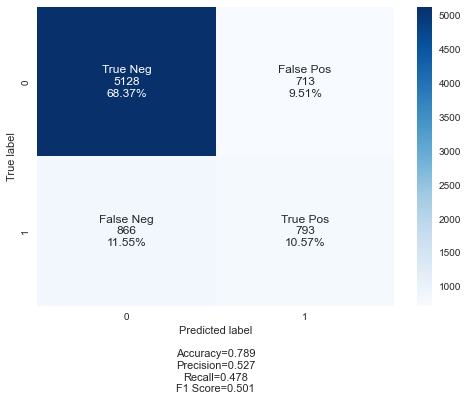

In [106]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Results Comparison

In [107]:
#Results

resultsDF_DT_HT = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
display(f"Decision Tree results with Hyper tunning",resultsDF_DT_HT,f"Inicial Decision Tree results",
      resultsDF_DT)

'Decision Tree results with Hyper tunning'

Measure     Train      Test
0   ACCURACY  0.836757  0.789467
1  PRECISION  0.876820  0.526560
2     RECALL  0.783599  0.477999
3   F1 SCORE  0.827592  0.501106
4        AUC  0.836757  0.677965

'Inicial Decision Tree results'

Measure     Train      Test
0   ACCURACY  0.808680  0.812800
1  PRECISION  0.937056  0.657993
2     RECALL  0.661816  0.320072
3   F1 SCORE  0.775745  0.430657
4        AUC  0.808680  0.636410

By hyper tunning some Decision Tree parameters it was possible to achieve some better and worst results in comparison with the first Decision Tree. In terms of accuracy, it is observed a higher value in the training set, although a worse performance in the test set. In terms of classifying the defaults among the actual and false defaults the hyper tunned Decision Tree also delivered a worse score. On the other hand, Recall was significantly better in both training and test set, meaning that this model captured more false negative classifications. Lastly, the F1-Score and AUC was also slightly better. Overall, if one only compared the AUC, the hyper tunned Decision Tree delivered better results, although less accurate and precise when faced with new observations, which may indicate signals of overfitting.

## Random Forest (RF)

### Modeling and Evaluation RF

We'll use Randomized Search to find the best parameters to implement in the Random Forest Model
Followed some instruction in this website https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In order to optimize the Random Forest Model it was executed the Randomized Search CV from the Scikit Learn package to obtain the best parameters of the model automatically, instead of trial and error. This approach selects a grid of parameters’ ranges and performs the K-Fold CV with each combination of values.

In [108]:
# Execute Randomized Search to hyper tune parameters

#Random Parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']
# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# Creating a random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


### Warning: It takes about 83 minutes to run the Randomized Search

In [109]:
# Creating the base model to tune

class_Model_HT = RandomForestClassifier(random_state = 123)

# Random search of parameters, using 10 fold cross validation, 

classModel_HT_random = RandomizedSearchCV(estimator = class_Model_HT, param_distributions = random_grid, n_iter = 10, cv = 5, random_state=123)

# Fit the random search model

classModel_HT_random.fit(X_train2, y_train2)

# predict y for X_train and X_test
y_pred_train = classModel_HT_random.predict(X_train2) 
y_pred_test = classModel_HT_random.predict(X_test) 

In [110]:
#Best parameters from fitting the random search

classModel_HT_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70}

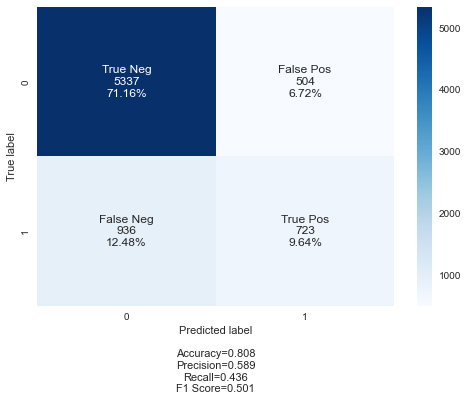

In [111]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Results Comparison

In [112]:
#Results

resultsDF_RF_HT = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
display(f"Random Forest results with Hyper tunning",resultsDF_RF_HT,f"Inicial Random Forest results",
      resultsDF_RF)

'Random Forest results with Hyper tunning'

Measure     Train      Test
0   ACCURACY  0.964418  0.808000
1  PRECISION  0.983886  0.589242
2     RECALL  0.944302  0.435805
3   F1 SCORE  0.963688  0.501040
4        AUC  0.964418  0.674759

'Inicial Random Forest results'

Measure     Train      Test
0   ACCURACY  0.791674  0.758667
1  PRECISION  0.810624  0.462716
2     RECALL  0.761171  0.564798
3   F1 SCORE  0.785119  0.508686
4        AUC  0.791674  0.689264

When comparing the initial Random Forest with the one with the hyper parameters, it is possible to observe a considerable increase in the training set, with results almost above 95%. In terms of Accuracy and Precision, it is verified a significant increase also in the test set, although the difference to the training set remains high. In terms of Recall, when faced with new data, the model classified more instances that have defaulted as no defaults (False Negatives). Overall, although the hyper tunned model delivered better results in the training set, the test set measures remained low, with the exception of Accuracy. This is evidence of overfitting the data. Additionally, if we compare both AUC from the test sets, the optimal parameters model presented worst results.   

## Results Comparison

In [113]:
#Initial Models

from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="horizontal-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)


display_side_by_side(resultsDF_DT, resultsDF_KNN, resultsDF_LR, resultsDF_LR_O, resultsDF_LR_U, resultsDF_NB
                     , resultsDF_NN, resultsDF_SVM, resultsDF_XGB, resultsDF_RF,
                     titles=['DT','KNN','LR','LR Over-Sampling'
                                                          ,'LR Under-Sampling', 'NB', 'NN', 'SVM', 'XGB', 'RF',])

DT 
 
 
 
 Measure 
 Train 
 Test 
 
 
 
 
 0 
 ACCURACY 
 0.808680 
 0.812800 
 
 
 1 
 PRECISION 
 0.937056 
 0.657993 
 
 
 2 
 RECALL 
 0.661816 
 0.320072 
 
 
 3 
 F1 SCORE 
 0.775745 
 0.430657 
 
 
 4 
 AUC 
 0.808680 
 0.636410 
 
 
 KNN 
 
 
 
 Measure 
 Train 
 Test 
 
 
 
 
 0 
 ACCURACY 
 0.856075 
 0.667867 
 
 
 1 
 PRECISION 
 0.807471 
 0.354137 
 
 
 2 
 RECALL 
 0.935114 
 0.608800 
 
 
 3 
 F1 SCORE 
 0.866617 
 0.447794 
 
 
 4 
 AUC 
 0.856075 
 0.646722 
 
 
 LR 
 
 
 
 Measure 
 Train 
 Test 
 
 
 
 
 0 
 ACCURACY 
 0.822533 
 0.814400 
 
 
 1 
 PRECISION 
 0.686223 
 0.650507 
 
 
 2 
 RECALL 
 0.364276 
 0.347800 
 
 
 3 
 F1 SCORE 
 0.475915 
 0.453260 
 
 
 4 
 AUC 
 0.658483 
 0.647363 
 
 
 LR Over-Sampling 
 
 
 
 Measure 
 Train 
 Test 
 
 
 
 
 0 
 ACCURACY 
 0.702648 
 0.772400 
 
 
 1 
 PRECISION 
 0.775570 
 0.487692 
 
 
 2 
 RECALL 
 0.570336 
 0.573237 
 
 
 3 
 F1 SCORE 
 0.657305 
 0.527016 
 
 
 4 
 AUC 
 0.702648 
 0.701102 
 
 
 LR Under-Sampling 
 
 
 
 Measure 
 Train 
 Test 
 
 
 
 
 0 
 ACCURACY 
 0.707253 
 0.772400 
 
 
 1 
 PRECISION 
 0.780680 
 0.487768 
 
 
 2 
 RECALL 
 0.576452 
 0.576854 
 
 
 3 
 F1 SCORE 
 0.663199 
 0.528583 
 
 
 4 
 AUC 
 0.707253 
 0.702397 
 
 
 NB 
 
 
 
 Measure 
 Train 
 Test 
 
 
 
 
 0 
 ACCURACY 
 0.547937 
 0.319333 
 
 
 1 
 PRECISION 
 0.526692 
 0.237907 
 
 
 2 
 RECALL 
 0.945900 
 0.942737 
 
 
 3 
 F1 SCORE 
 0.676627 
 0.379934 
 
 
 4 
 AUC 
 0.547937 
 0.542503 
 
 
 NN 
 
 
 
 Measure 
 Train 
 Test 
 
 
 
 
 0 
 ACCURACY 
 0.720539 
 0.756267 
 
 
 1 
 PRECISION 
 0.772244 
 0.460606 
 
 
 2 
 RECALL 
 0.625578 
 0.595539 
 
 
 3 
 F1 SCORE 
 0.691216 
 0.519453 
 
 
 4 
 AUC 
 0.720539 
 0.698728 
 
 
 SVM 
 
 
 
 Measure 
 Train 
 Test 
 
 
 
 
 0 
 ACCURACY 
 0.724048 
 0.773733 
 
 
 1 
 PRECISION 
 0.805906 
 0.489850 
 
 
 2 
 RECALL 
 0.590253 
 0.552743 
 
 
 3 
 F1 SCORE 
 0.681424 
 0.519400 
 
 
 4 
 AUC 
 0.724048 
 0.694622 
 
 
 XGB 
 
 
 
 Measure 
 Train 
 Test 
 
 
 
 
 0 
 ACCURACY 
 0.720225 
 0.749867 
 
 
 1 
 PRECISION 
 0.783875 
 0.452350 
 
 
 2 
 RECALL 
 0.608115 
 0.620856 
 
 
 3 
 F1 SCORE 
 0.684899 
 0.523374 
 
 
 4 
 AUC 
 0.720225 
 0.703683 
 
 
 RF 
 
 
 
 Measure 
 Train 
 Test 
 
 
 
 
 0 
 ACCURACY 
 0.791674 
 0.758667 
 
 
 1 
 PRECISION 
 0.810624 
 0.462716 
 
 
 2 
 RECALL 
 0.761171 
 0.564798 
 
 
 3 
 F1 SCORE 
 0.785119 
 0.508686 
 
 
 4 
 AUC 
 0.791674 
 0.689264

In [115]:
#Models with hyper tunning

display_side_by_side(resultsDF_DT_HT, resultsDF_KNN_HT_4, resultsDF_NB_HT
                     , resultsDF_NN_HT, resultsDF_RF_HT,
                     titles=['DT_HT','KNN_HT(K=4)', 'NB_HT', 'NN_HT', 'RF_HT'])

DT_HT 
 
 
 
 Measure 
 Train 
 Test 
 
 
 
 
 0 
 ACCURACY 
 0.836757 
 0.789467 
 
 
 1 
 PRECISION 
 0.876820 
 0.526560 
 
 
 2 
 RECALL 
 0.783599 
 0.477999 
 
 
 3 
 F1 SCORE 
 0.827592 
 0.501106 
 
 
 4 
 AUC 
 0.836757 
 0.677965 
 
 
 KNN_HT(K=4) 
 
 
 
 Measure 
 Train 
 Test 
 
 
 
 
 0 
 ACCURACY 
 0.888889 
 0.711333 
 
 
 1 
 PRECISION 
 0.885109 
 0.383945 
 
 
 2 
 RECALL 
 0.893797 
 0.504521 
 
 
 3 
 F1 SCORE 
 0.889432 
 0.436051 
 
 
 4 
 AUC 
 0.888889 
 0.637297 
 
 
 NB_HT 
 
 
 
 Measure 
 Train 
 Test 
 
 
 
 
 0 
 ACCURACY 
 0.547937 
 0.319333 
 
 
 1 
 PRECISION 
 0.526692 
 0.237907 
 
 
 2 
 RECALL 
 0.945900 
 0.942737 
 
 
 3 
 F1 SCORE 
 0.676627 
 0.379934 
 
 
 4 
 AUC 
 0.547937 
 0.542503 
 
 
 NN_HT 
 
 
 
 Measure 
 Train 
 Test 
 
 
 
 
 0 
 ACCURACY 
 0.719340 
 0.756800 
 
 
 1 
 PRECISION 
 0.774477 
 0.461286 
 
 
 2 
 RECALL 
 0.618901 
 0.592526 
 
 
 3 
 F1 SCORE 
 0.688004 
 0.518734 
 
 
 4 
 AUC 
 0.719340 
 0.697992 
 
 
 RF_HT 
 
 
 
 Measure 
 Train 
 Test 
 
 
 
 
 0 
 ACCURACY 
 0.964418 
 0.808000 
 
 
 1 
 PRECISION 
 0.983886 
 0.589242 
 
 
 2 
 RECALL 
 0.944302 
 0.435805 
 
 
 3 
 F1 SCORE 
 0.963688 
 0.501040 
 
 
 4 
 AUC 
 0.964418 
 0.674759

## Conclusion

There can be two different approaches in order to choose the preferred model. The first would be to focus on general performance measures, such as the F1-Score and the AUC. Here, the XGB model was the one that retrieved higher values when compared to the other models: an AUC of 70,37% in the test set (with a difference of 0,016 to the training set) and a F1-Score of 52,34% (when compared to 68,49% obtained with the training set). It is important that the difference between the obtained measures when using the two sets are as close as possible. 
Furthermore, taking into consideration the problem the model is trying to solve (predict which customers are going to default on the following month), the precision measure is the one that should be prioritized, as one wants to predict as many default observations as possible, even the false positives. Considering this, the model that retrieved the highest precision was the Decision Tree (65,80%). Although, when compared to the training set, this represents a difference of 0,28 and, despite the Logistic Regression model had obtained a slightly lower value for this performance measure (65%), the difference to the train set is only  0,03 and thus, should be the chosen model when one wants to prevail precision as the most important measure.
